<a href="https://colab.research.google.com/github/Jeanette22/Jeanette22/blob/main/Proyecto_preparaci%C3%B3n_de_los_datos%2C_limpieza%2C_estandarizaci%C3%B3n%2C_revisi%C3%B3n%2C_an%C3%A1lisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de preparación de datos: carga de datos, limpieza, y estandarización** 

---



### **En el siguiente proyecto utilizo el dataset de: http://datos.yvera.tur.ar/dataset/turismo-emisivo **, 
####que muestra a nivel estadistico el turismo emisivo de los turistas residentes que viajaron al exterior, especificando los medios de transporte como el terrestre, fluvial, aereo, y maritimos. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
print("****Lectura de los datos****")
dataset1 = pd.read_csv ("/content/drive/MyDrive/turistas-residentes-serie.csv")

****Lectura de los datos****


In [ ]:
dataset1 # Variacion de visitas por fecha 

,indice_tiempo,medio_de_transporte,pais_destino,turistas_residentes
0,2016-01,Aérea,Bolivia,4206.6
1,2016-01,Aérea,Brasil,105255.5
2,2016-01,Aérea,Chile,27596.7
3,2016-01,Aérea,Paraguay,3097.2
4,2016-01,Aérea,Uruguay,15872.2
...,...,...,...,...
1912,2021-11,Terrestre,Uruguay,7300.0
1913,2021-11,Terrestre,EE.UU. y Canadá,0.0
1914,2021-11,Terrestre,Resto de América,0.0
1915,2021-11,Terrestre,Europa,0.0




```
# Tiene formato de código
```

**Cambio de formato de fecha**

El objetivo de realizar esto en la prepación de los datos, es para que los valores de la fecha este listo en caso de quedamos manipular esas fechas, algunos casos como restar una fecha con otra, extraer un mes especifico, dia, u otra opción (day, time), para que el programa reconozca estos valores como fechas. 
En definitiva: **Para manipular fechas siempre hay que convertilas en objetos**


In [ ]:
# Cambio de formato de la fecha: 
from datetime import datetime
print("Fixing timestamps...")
dataset1['indice_tiempo'] = pd.to_datetime(dataset1['indice_tiempo'], format='%Y-%m-%d')


Fixing timestamps...


In [ ]:
dataset1

,indice_tiempo,medio_de_transporte,pais_destino,turistas_residentes
0,2016-01-01,Aérea,Bolivia,4206.6
1,2016-01-01,Aérea,Brasil,105255.5
2,2016-01-01,Aérea,Chile,27596.7
3,2016-01-01,Aérea,Paraguay,3097.2
4,2016-01-01,Aérea,Uruguay,15872.2
...,...,...,...,...
1912,2021-11-01,Terrestre,Uruguay,7300.0
1913,2021-11-01,Terrestre,EE.UU. y Canadá,0.0
1914,2021-11-01,Terrestre,Resto de América,0.0
1915,2021-11-01,Terrestre,Europa,0.0


In [ ]:
data1= pd.DataFrame (dataset1) #En este paso, genero una nueva variable y creo un dataframe.

In [ ]:
data1.iloc[:,[2,3]] #accedo a datos especificos que necesito: en este caso señalo  que sean todas las filas 
#de las columnas 2 y 3

,pais_destino,turistas_residentes
0,Bolivia,4206.6
1,Brasil,105255.5
2,Chile,27596.7
3,Paraguay,3097.2
4,Uruguay,15872.2
...,...,...
1912,Uruguay,7300.0
1913,EE.UU. y Canadá,0.0
1914,Resto de América,0.0
1915,Europa,0.0


In [ ]:
import matplotlib.pyplot as plt 

### **En el siguiente gráfico puede notarse en datalle a los paises dónde más viajaron los residentes de Argentina:**

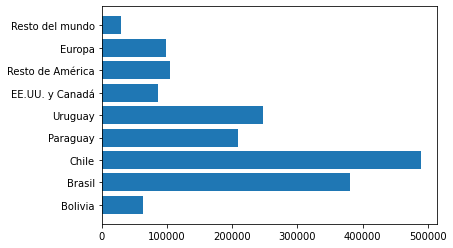

<Figure size 720x288 with 0 Axes>

In [160]:
fig, ax = plt.subplots()
ax.barh(dataset1['pais_destino'], dataset1['turistas_residentes']) #Seleccion de datos desde el dataset que usamos
plt.figure(figsize=(10,4))
plt.show()

In [83]:
dataset1.isnull() #Revisamos si en el dataset hay datos nulos que debería eliminar o cambiar
#también es importante analizar las columnas (que éstas tengan datos, o sino eliminarlas)
#isnull devuleve un valor booleano, es decir que si hay valor nulo, muestra un true. 


,indice_tiempo,medio_de_transporte,pais_destino,turistas_residentes
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1912,False,False,False,False
1913,False,False,False,False
1914,False,False,False,False
1915,False,False,False,False


In [84]:
dataset1.notnull() #inverso a lo anterior. 

,indice_tiempo,medio_de_transporte,pais_destino,turistas_residentes
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
1912,True,True,True,True
1913,True,True,True,True
1914,True,True,True,True
1915,True,True,True,True


In [99]:
datos_chile = dataset1.loc[2,:]  #Armo una serie de una columna especifica, en este caso utilizo paises 
print (type(datos_chile))


<class 'pandas.core.series.Series'>


In [100]:
datos_chile

indice_tiempo          2016-01-01 00:00:00
medio_de_transporte                  Aérea
pais_destino                         Chile
turistas_residentes                27596.7
Name: 2, dtype: object

In [102]:
datos_chile.values #vemos los valores de la primera fila de la columna Chile, el destino con mas viajas de resid arg. 

array([Timestamp('2016-01-01 00:00:00'), 'Aérea', 'Chile', 27596.7],
      dtype=object)

In [104]:
datos_chile.index #en estre caso vemos los indices

Index(['indice_tiempo', 'medio_de_transporte', 'pais_destino',
       'turistas_residentes'],
      dtype='object')

In [105]:
datos_chile.shape

(4,)

In [106]:
dataset1.query('indice_tiempo == 2021') #En este caso le pedi que me muestre solo los datos del año 2021 

,indice_tiempo,medio_de_transporte,pais_destino,turistas_residentes
1620,2021-01-01,Aérea,Bolivia,1481.0
1621,2021-01-01,Aérea,Brasil,10860.0
1622,2021-01-01,Aérea,Chile,5501.0
1623,2021-01-01,Aérea,Paraguay,2297.0
1624,2021-01-01,Aérea,Uruguay,186.0
1625,2021-01-01,Aérea,EE.UU. y Canadá,15549.0
1626,2021-01-01,Aérea,Resto de América,17529.0
1627,2021-01-01,Aérea,Europa,4481.0
1628,2021-01-01,Aérea,Resto del mundo,1420.0
1629,2021-01-01,Fluvial/Marítima,Bolivia,0.0


In [124]:
dataset1.iloc[:, [0,2,3]] #seleccionamos columnas seleccionadas y todos sus filas (:), num de colum. 

,indice_tiempo,pais_destino,turistas_residentes
0,2016-01-01,Bolivia,4206.6
1,2016-01-01,Brasil,105255.5
2,2016-01-01,Chile,27596.7
3,2016-01-01,Paraguay,3097.2
4,2016-01-01,Uruguay,15872.2
...,...,...,...
1912,2021-11-01,Uruguay,7300.0
1913,2021-11-01,EE.UU. y Canadá,0.0
1914,2021-11-01,Resto de América,0.0
1915,2021-11-01,Europa,0.0


### **Vemos algunas estadisticas, ejemplo: promedio, minimos, maximos, etc.**

In [130]:
dataset1['turistas_residentes'].describe() 

count      1917.000000
mean      24190.474022
std       45995.480085
min           0.000000
25%          93.000000
50%        3472.200000
75%       31854.100000
max      489167.400000
Name: turistas_residentes, dtype: float64

In [138]:
grupo_estadistico = data1.groupby('pais_destino') #armo un grupo 

In [142]:
grupo_estadistico.describe()

turistas_residentes                ...                   
                               count          mean  ...      75%       max
pais_destino                                        ...                   
Bolivia                        213.0  10881.380282  ...  11836.0   63329.7
Brasil                         213.0  49534.319249  ...  64055.4  381008.5
Chile                          213.0  40877.549296  ...  45379.0  489167.4
EE.UU. y Canadá                213.0  17631.541315  ...  21162.0   86289.8
Europa                         213.0  15257.216432  ...  14371.0   98722.8
Paraguay                       213.0  27256.550704  ...  19337.9  209078.6
Resto de América               213.0  19105.918779  ...  19421.0  104301.5
Resto del mundo                213.0   3884.572300  ...   1074.0   29964.2
Uruguay                        213.0  33285.217840  ...  44326.7  246634.6

[9 rows x 8 columns]